<a href="https://colab.research.google.com/github/sage-27/myfrstrepo/blob/main/birdstrikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [15]:
bird_strikes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bird Strikes data.xlsx - Bird Strikes (1).csv')

In [31]:
bird_strikes_data.head(10)


,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes,2000.0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001.0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No,2001.0
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes,2002.0
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No,2003.0
6,221697,Airplane,NEW CASTLE COUNTY,< 1000 ft,LEARJET-25,Over 100,227,Other,2003-08-17,Caused damage,...,NaN,Small,No Cloud,European starling,N,"1,481,711",150,0,No,2003.0
7,236635,Airplane,WASHINGTON DULLES INTL ARPT,< 1000 ft,A-320,Over 100,320,Other,2006-03-01,Caused damage,...,WS ASSISTED IN CLEAN-UP OF 273 STARLINGS AND 1...,Small,Some Cloud,European starling,Y,"1,483,141",100,0,No,2006.0
8,207369,Airplane,ATLANTA INTL,< 1000 ft,DC-9-30,2 to 10,9,Aborted Take-off,2000-01-06,No damage,...,NaN,Small,Some Cloud,Rock pigeon,N,0,0,0,No,2000.0
9,204371,Airplane,ORLANDO SANFORD INTL AIRPORT,< 1000 ft,A-330,2 to 10,4,None,2000-01-07,No damage,...,FLT 057,Small,Some Cloud,Unknown bird - small,N,0,0,0,No,2000.0
10,201589,Airplane,ONTARIO INTL ARPT,< 1000 ft,A-320,2 to 10,3,None,2000-01-08,No damage,...,FLEW THRU A FLOCK OF ABOUT 30 BIRDS. INGESTED ...,Small,Some Cloud,Rock pigeon,N,0,200,0,No,2000.0


#Case Studies
##Visuals Depicting the Number of Bird Strikes

● Yearly Analysis & Bird Strikes in the US

● Top 10 US Airlines in terms of having encountered bird strikes

● Airports with most incidents of bird strikes – Top 50

● Yearly Cost Incurred due to Bird Strikes:

● When do most bird strikes occur?

● Altitude of aeroplanes at the time of strike

● Phase of flight at the time of the strike.

● Average Altitude of the aeroplanes in different phases at the time of strike

● Effect of Bird Strikes & Impact on Flight

● Effect of Strike at Different Altitude

● Were Pilots Informed? & Prior Warning and Effect of Strike Relation

In [20]:
def plot_bar_chart(data, x, y, title, xlabel, ylabel, rotation=0, figsize=(10,6)):
    plt.figure(figsize=figsize)
    sb.barplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()




In [21]:
# Converting FlightDate to datetime
bird_strikes_data['FlightDate'] = pd.to_datetime(bird_strikes_data['FlightDate'], errors='coerce')

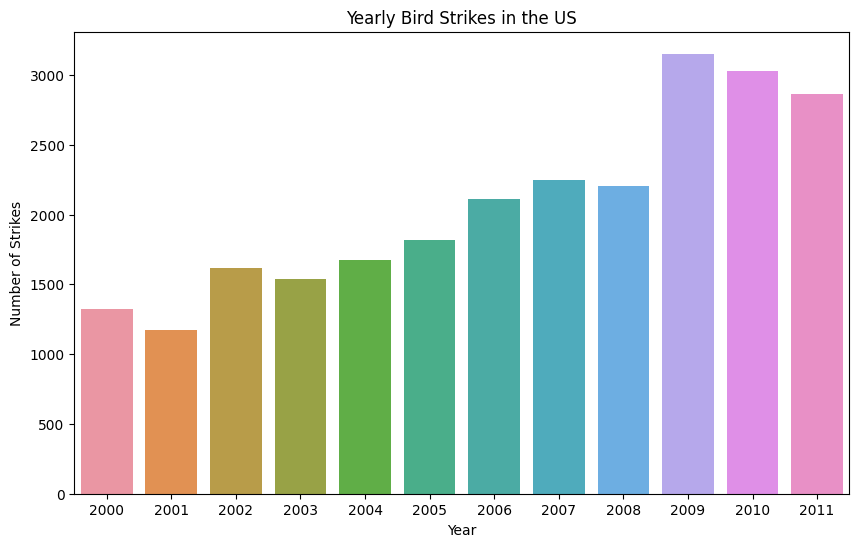

In [32]:
# 1. Yearly Analysis & Bird Strikes in the US
bird_strikes_data['Year'] = bird_strikes_data['FlightDate'].dt.year
yearly_strikes = bird_strikes_data.groupby('Year').size().reset_index(name='Strikes')
plot_bar_chart(yearly_strikes, 'Year', 'Strikes', 'Yearly Bird Strikes in the US', 'Year', 'Number of Strikes')




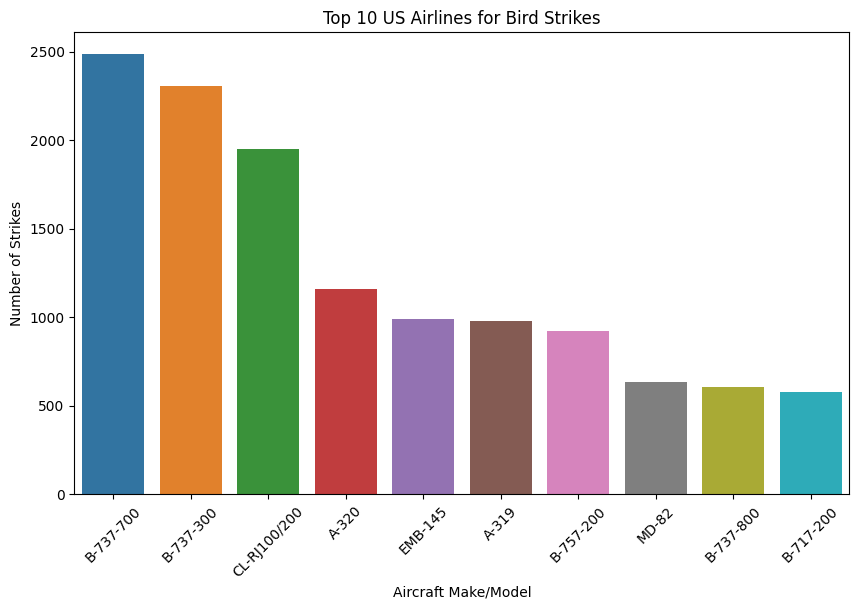

In [33]:
# 2. Top 10 US Airlines in terms of having encountered bird strikes
top_airlines = bird_strikes_data['Aircraft: Make/Model'].value_counts().head(10).reset_index()
top_airlines.columns = ['Aircraft Make/Model', 'Strikes']
plot_bar_chart(top_airlines, 'Aircraft Make/Model', 'Strikes', 'Top 10 US Airlines for Bird Strikes', 'Aircraft Make/Model', 'Number of Strikes', rotation=45)

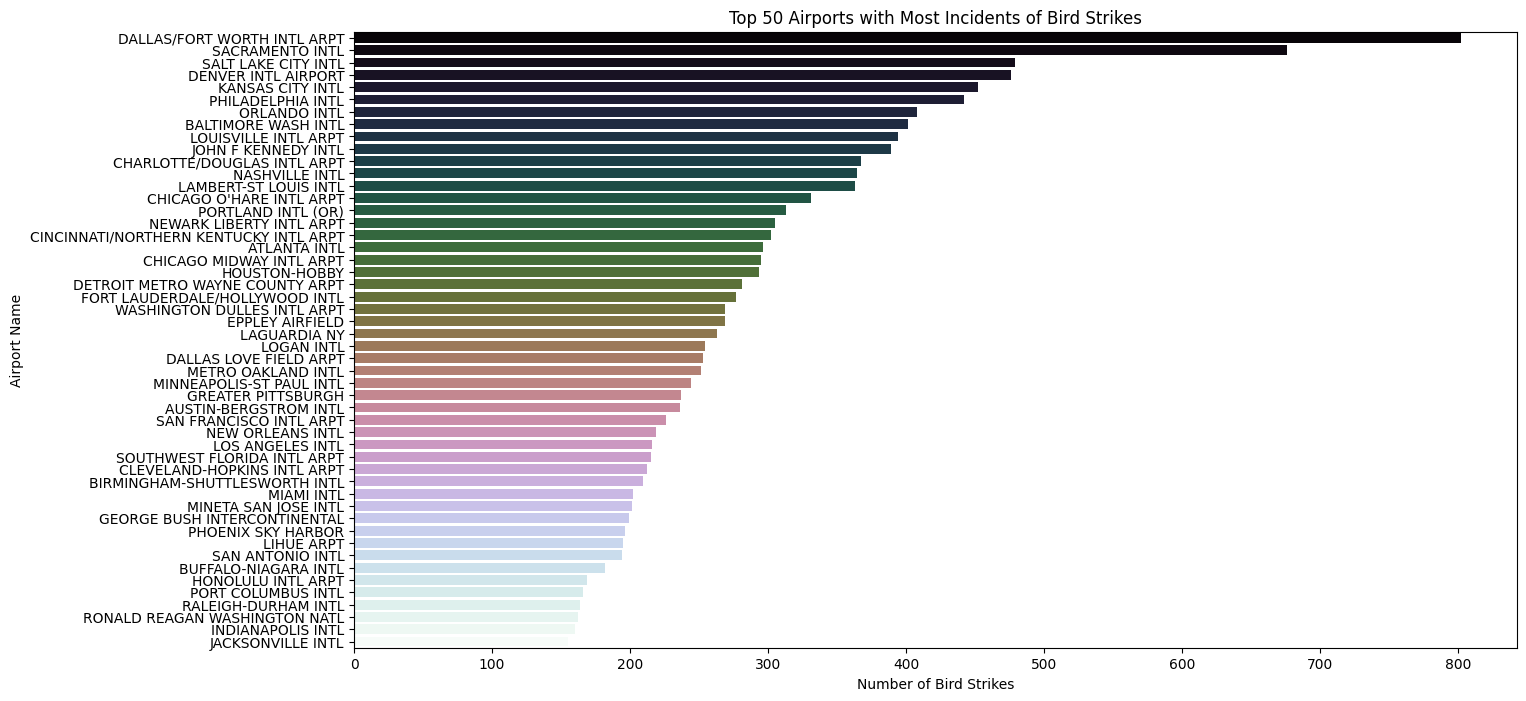

In [54]:
# 3. Airports with most incidents of bird strikes – Top 50
airport_strike_counts = bird_strikes_data['Airport: Name'].value_counts()

# Selecting the top 50 airports
top_50_airports = airport_strike_counts.head(50)

# Creating a bar chart for the top 50 airports with the most bird strikes
plt.figure(figsize=(15, 8))
sb.barplot(y=top_50_airports.index, x=top_50_airports.values, palette="cubehelix")
plt.title('Top 50 Airports with Most Incidents of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport Name')
plt.show()


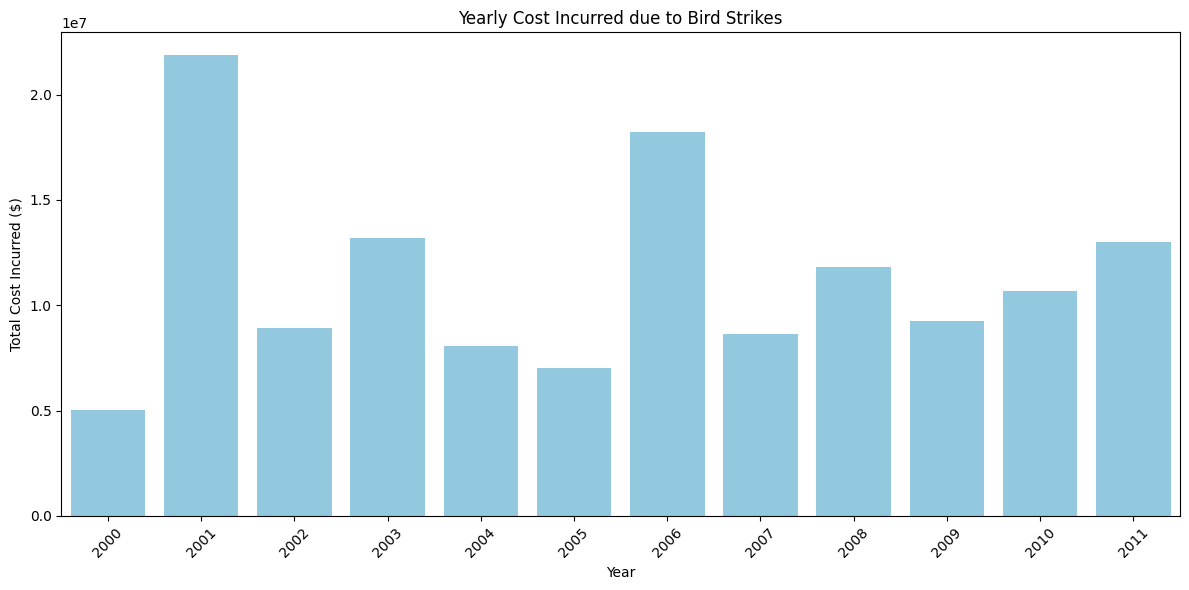

In [44]:
# 4. Yearly Cost Incurred due to Bird Strikes
# Clean up and convert 'Cost: Total $' to numeric
bird_strikes_data['Cost: Total $'] = bird_strikes_data['Cost: Total $'].replace('[\$,]', '', regex=True).astype(float)

# Group by Year and sum up the costs
yearly_costs = bird_strikes_data.groupby('Year')['Cost: Total $'].sum()

# Create a plot for yearly cost incurred due to bird strikes
plt.figure(figsize=(12, 6))
sb.barplot(x=yearly_costs.index, y=yearly_costs.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Cost Incurred ($)')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.tight_layout()

plt.show()

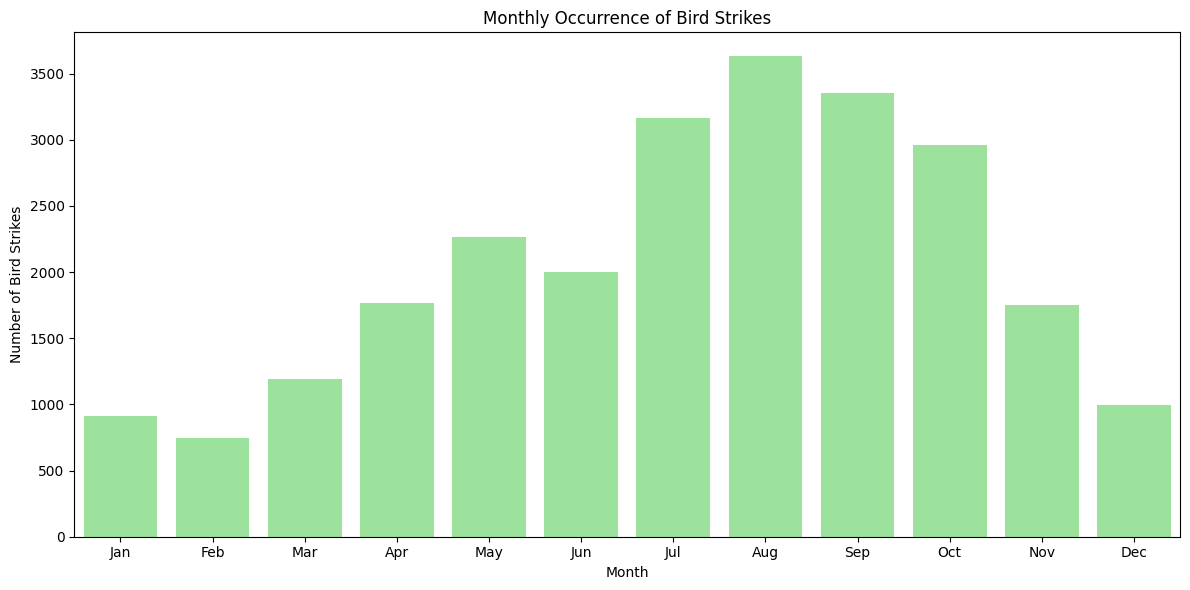

In [45]:
# 5. When do most bird strikes occur?
# Extract month from the 'FlightDate'
bird_strikes_data['Month'] = bird_strikes_data['FlightDate'].dt.month

# Group by Month and count the number of bird strikes
monthly_strikes = bird_strikes_data.groupby('Month').size()

# Create a plot for monthly occurrence of bird strikes
plt.figure(figsize=(12, 6))
sb.barplot(x=monthly_strikes.index, y=monthly_strikes.values, color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.title('Monthly Occurrence of Bird Strikes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

plt.show()


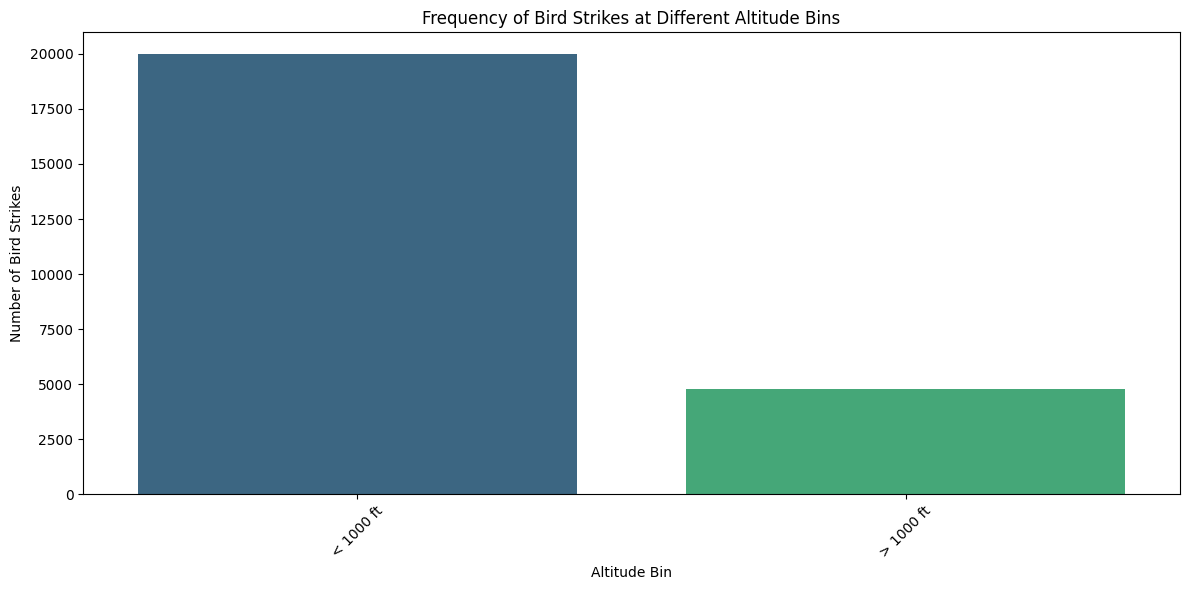

In [47]:
# 6. Altitude of aeroplanes at the time of strike
# Group by 'Altitude bin' and count the number of bird strikes
altitude_strikes = bird_strikes_data.groupby('Altitude bin').size().sort_values(ascending=False)

# Create a plot for frequency of bird strikes at different altitude bins
plt.figure(figsize=(12, 6))
sb.barplot(x=altitude_strikes.index, y=altitude_strikes.values, palette="viridis")
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.title('Frequency of Bird Strikes at Different Altitude Bins')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

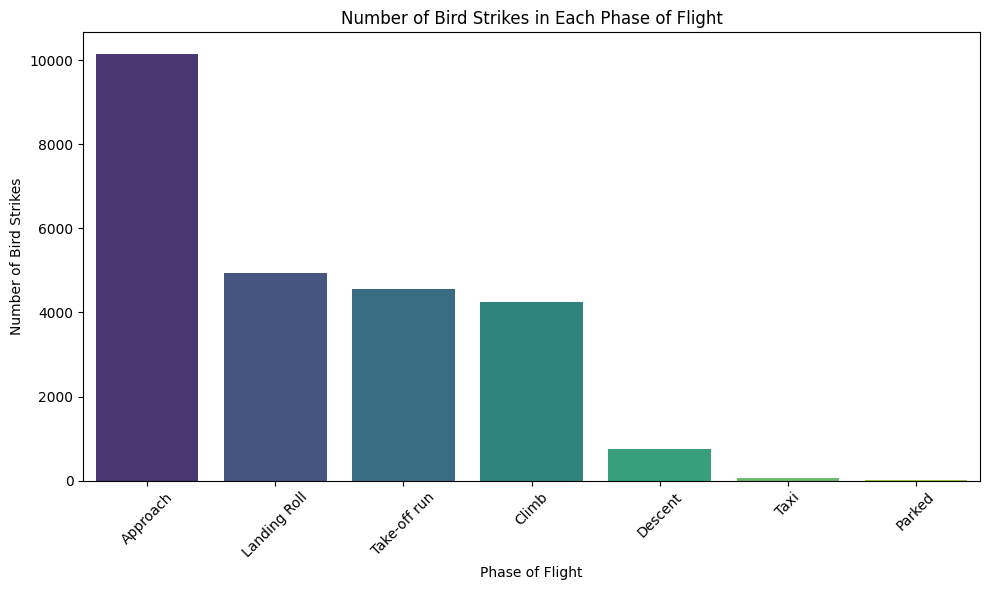

In [49]:
# 7. Phase of flight at the time of the strike.

phase_of_flight_counts = bird_strikes_data['When: Phase of flight'].value_counts()

# Creating a bar chart
plt.figure(figsize=(10, 6))
sb.barplot(x=phase_of_flight_counts.index, y=phase_of_flight_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Number of Bird Strikes in Each Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.tight_layout()
plt.show()

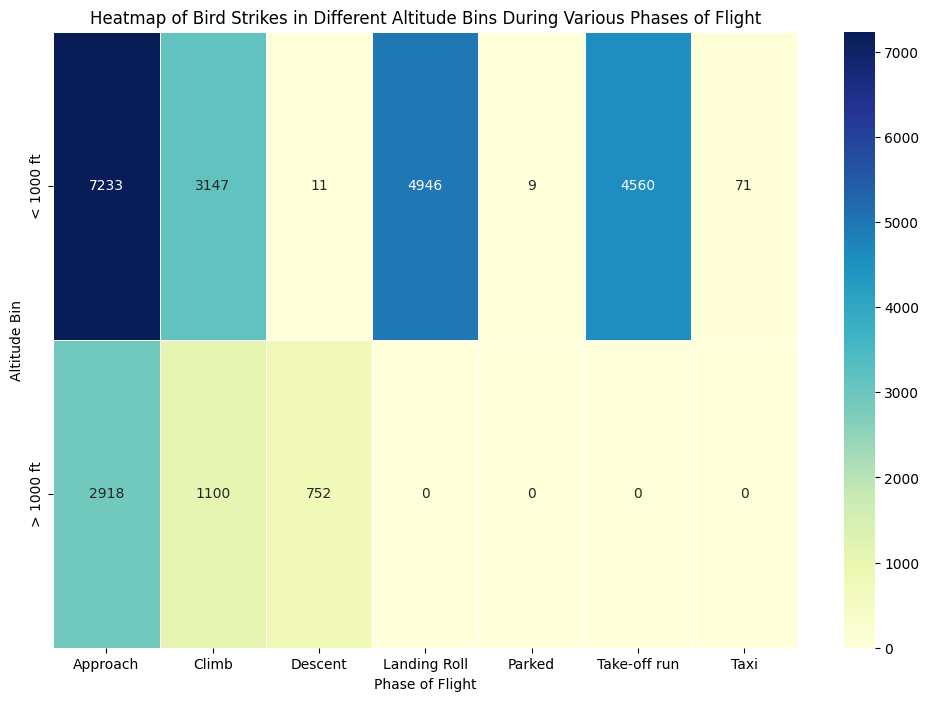

In [50]:
# 8. Average Altitude of the aeroplanes in different phases at the time of strike
pivot_table = bird_strikes_data.pivot_table(index='Altitude bin',
                                            columns='When: Phase of flight',
                                            aggfunc='size',
                                            fill_value=0)

# Creating the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Bird Strikes in Different Altitude Bins During Various Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Altitude Bin')
plt.show()

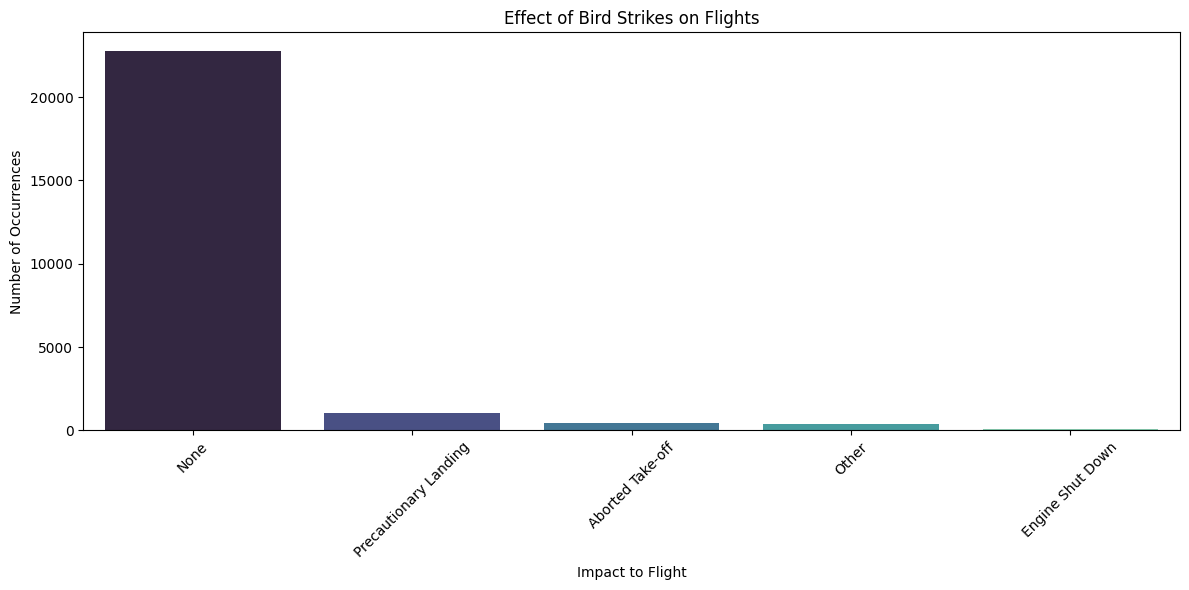

In [52]:
# 9.  Effect of Bird Strikes & Impact on Flight
impact_to_flight_counts = bird_strikes_data['Effect: Impact to flight'].value_counts()

# Creating a bar chart for the impact of bird strikes on flights
plt.figure(figsize=(12, 6))
sb.barplot(x=impact_to_flight_counts.index, y=impact_to_flight_counts.values, palette="mako")
plt.xticks(rotation=45)
plt.title('Effect of Bird Strikes on Flights')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

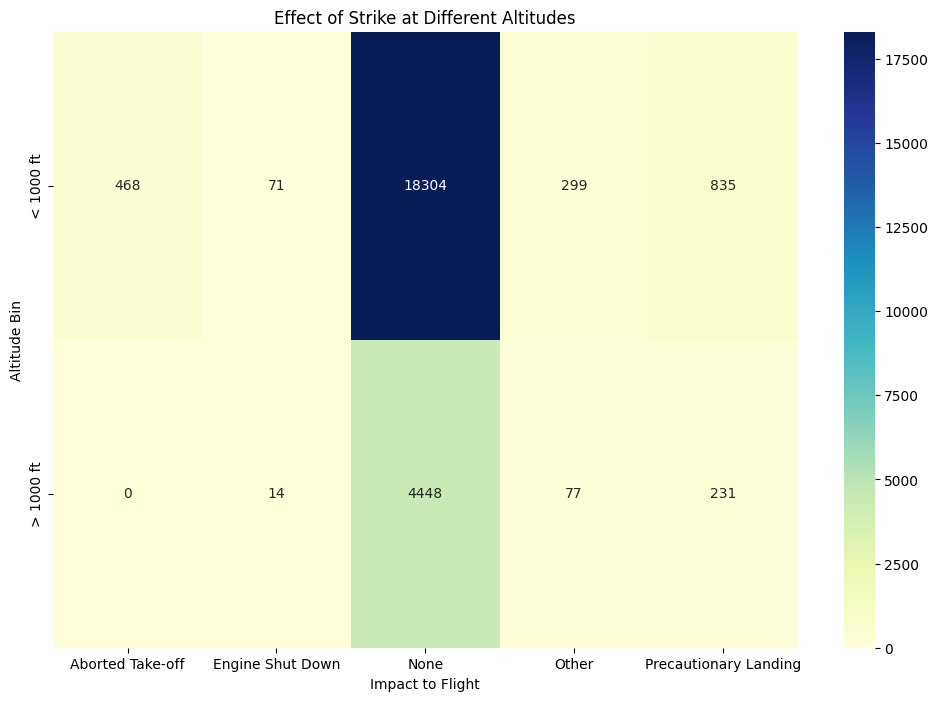

In [42]:
# 10. Effect of Strike at Different Altitude
# This combines both the altitude bin and the impact to flight.
altitude_impact_counts = bird_strikes_data.groupby('Altitude bin')['Effect: Impact to flight'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sb.heatmap(altitude_impact_counts, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Effect of Strike at Different Altitudes")
plt.xlabel("Impact to Flight")
plt.ylabel("Altitude Bin")
plt.show()

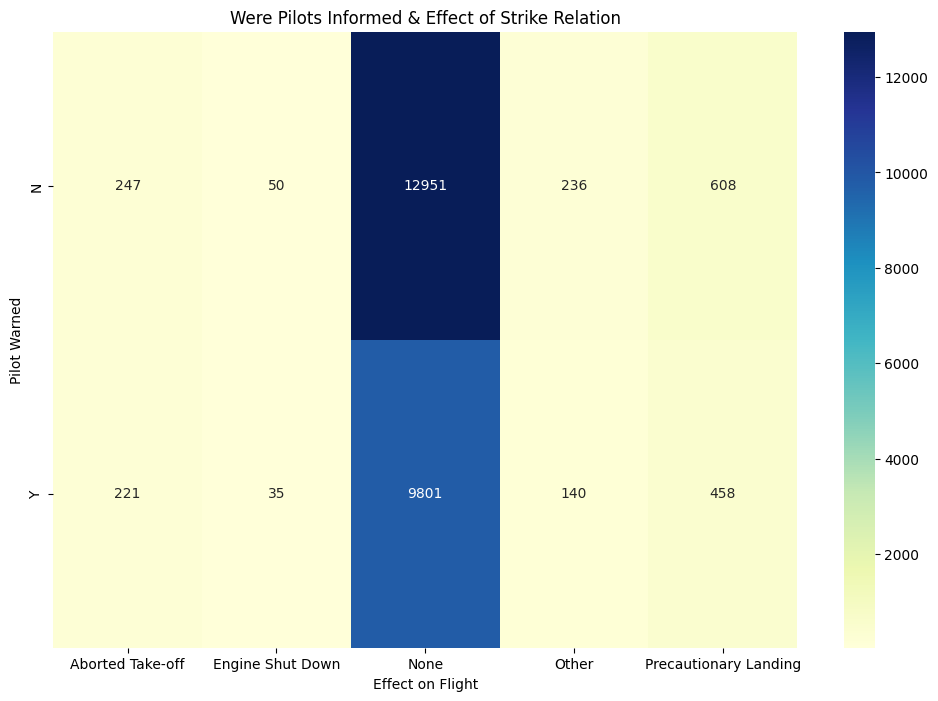

In [38]:
# 11. Were Pilots Informed? & Prior Warning and Effect of Strike Relation

pilot_warning_effect = bird_strikes_data.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sb.heatmap(pilot_warning_effect, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Were Pilots Informed & Effect of Strike Relation")
plt.xlabel("Effect on Flight")
plt.ylabel("Pilot Warned")
plt.show()